<a href="https://colab.research.google.com/github/veerasaireddy/Capstone-Project/blob/main/Yet_another_copy_of_skincancerdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
drive_path = '/content/drive/MyDrive/archive'
for dirname, _, filenames in os.walk(drive_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:

import numpy as np
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.listdir("/content/gdrive/MyDrive/Train")

['benign(train)', 'malignant(train)']

In [ ]:
os.listdir("/content/gdrive/MyDrive/Test")

['benign(test)', 'malignant(test)']

In [ ]:
import tensorflow as tf
import os
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
train_dir="/content/gdrive/MyDrive/Train"


test_dir="/content/gdrive/MyDrive/Test"

In [ ]:

label=["'malignant","benign"]

In [ ]:

print("class")
for i in range(len(label)):
  print(i,end=" ")
  print(label[i])


class
0 'malignant
1 benign


In [ ]:

print("number of classes:",len(label))

number of classes: 2


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model



In [ ]:
!pip install keras

In [ ]:
train_dir="/content/gdrive/MyDrive/Train"


test_dir="/content/gdrive/MyDrive/Test"

In [ ]:
# Define data generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='validation')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 2680 images belonging to 2 classes.
Found 669 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Malignant(test) Images:


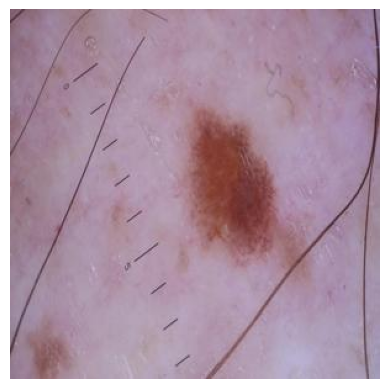

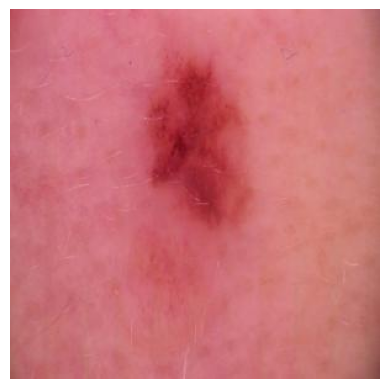

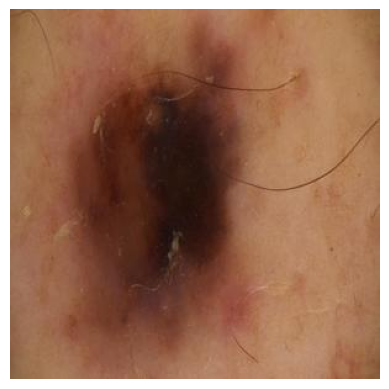

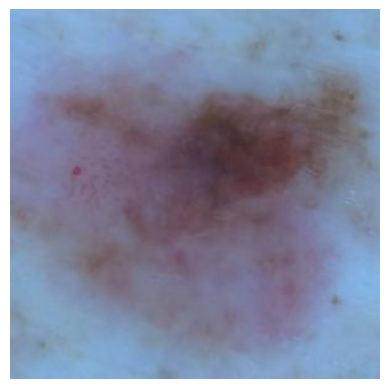

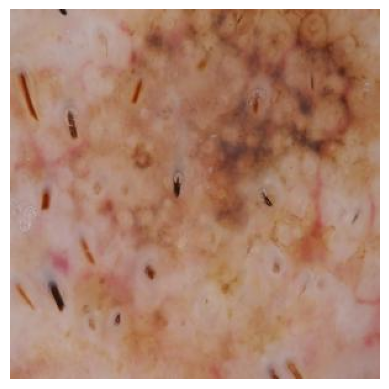

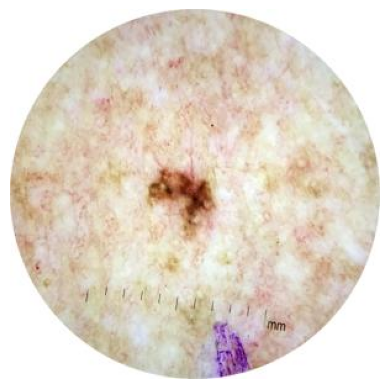

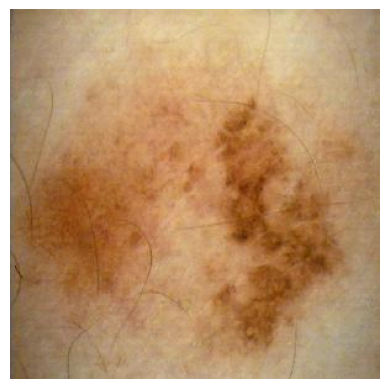

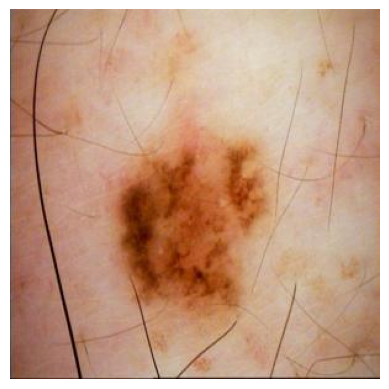

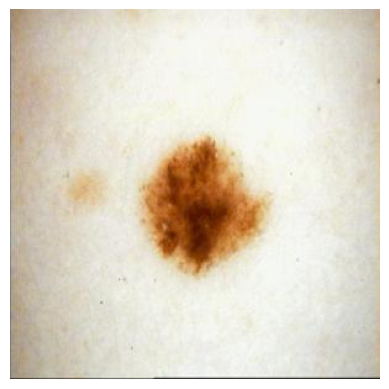

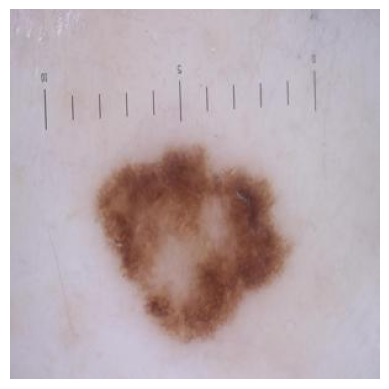

Benign(test) Images:


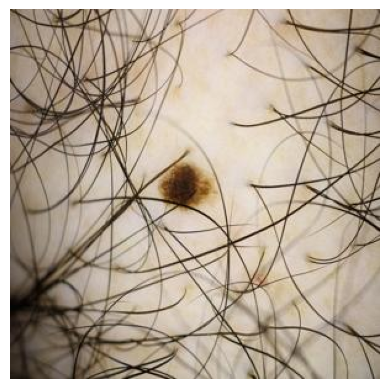

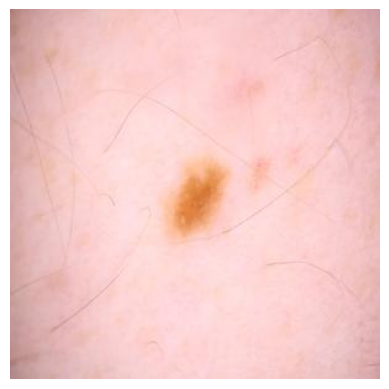

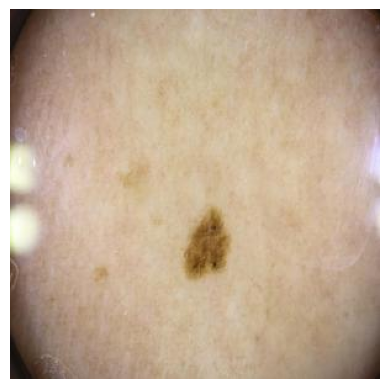

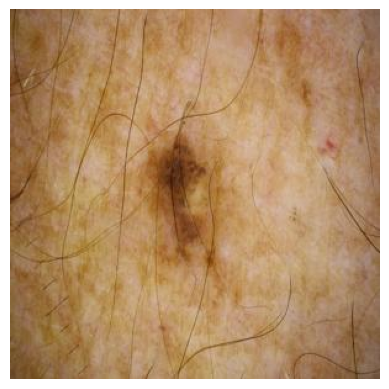

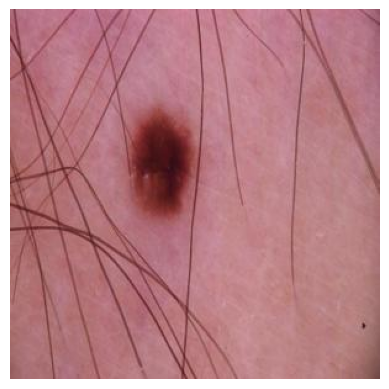

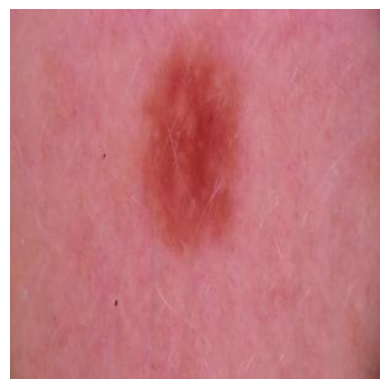

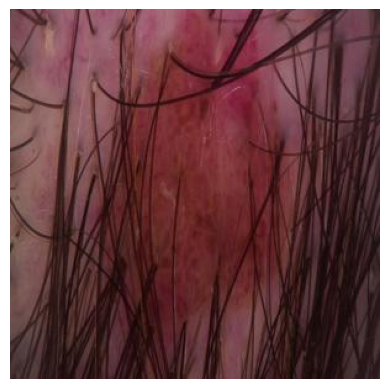

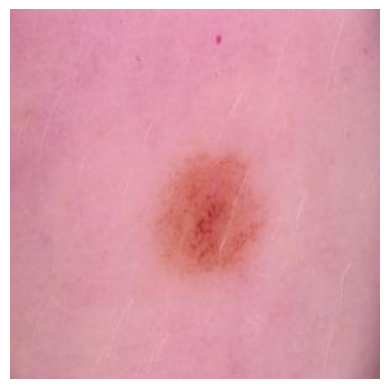

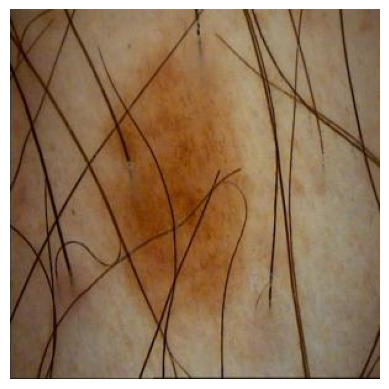

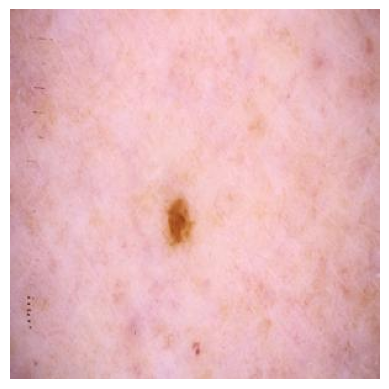

In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the dataset
data_path ='/content/gdrive/MyDrive/Test'

# Define the classes
classes = ['malignant(test)', 'benign(test)']

# Print 10 images of each class
for cls in classes:
    cls_path = os.path.join(data_path, cls)
    cls_images = os.listdir(cls_path)[:10]
    print(f"{cls.capitalize()} Images:")
    for img_file in cls_images:
        img_path = os.path.join(cls_path, img_file)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    #print('\n')


In [ ]:
# Add custom layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
#output layer fully connected dance layer with two neuron
predictions = Dense(2, activation='softmax')(x)


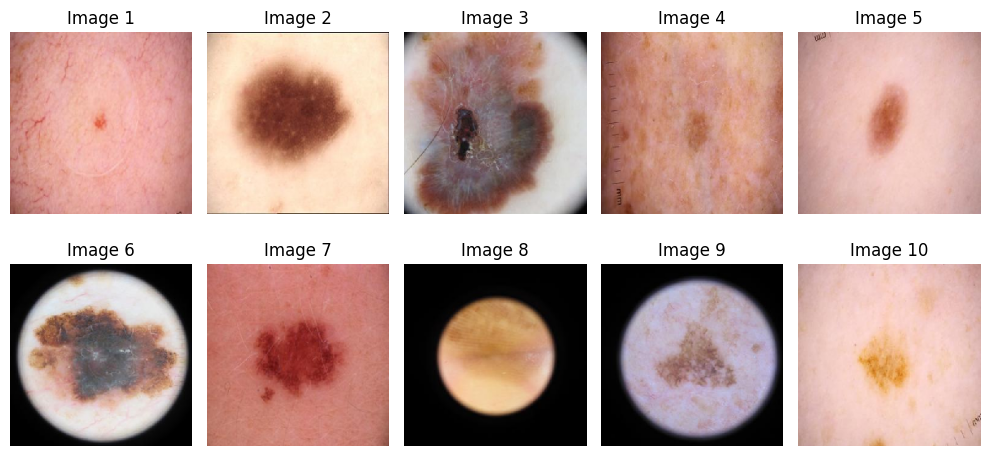

In [ ]:

import matplotlib.pyplot as plt

# Get the first 10 images from the test generator
x_test, y_test = next(test_generator)
x_test_first10 = x_test[:10]

# Plot the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_first10[i])
    ax.set_title("Image {}".format(i+1))
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Combine the base ResNet50 model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 74,969,474 (285.99 MB)

 Trainable params: 74,916,354 (285.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:

# Freeze all layers in the base ResNet50 model
for layer in base_model.layers[5:]:
    layer.trainable = False
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 74,969,474 (285.99 MB)

 Trainable params: 51,391,362 (196.04 MB)

 Non-trainable params: 23,578,112 (89.94 MB)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Example dataset
your_data = np.random.rand(1000, 20)  # 1000 samples, 20 features
your_labels = np.random.randint(0, 2, 1000)  # 1000 labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(your_data, your_labels, test_size=0.2, random_state=42)

# Define a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),  # 20 input features
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a callback for learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=2,
                                            factor=0.5,
                                            min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=20,
                    batch_size=32,  # Example batch size
                    verbose=1,
                    callbacks=[learning_rate_reduction])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5282 - loss: 0.7004 - val_accuracy: 0.4563 - val_loss: 0.7027 - learning_rate: 0.0010
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5305 - loss: 0.6904 - val_accuracy: 0.5063 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6851 - val_accuracy: 0.4625 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5480 - loss: 0.6850 - val_accuracy: 0.4812 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5716 - loss: 0.6818 - val_accuracy: 0.5562 - val_loss: 0.6897 - learning_rate: 0.0010
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5649 - loss: 0.6752 - val_accuracy: 0.4875 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5901 - loss: 0.6740 - val_accuracy: 0.5000 - v

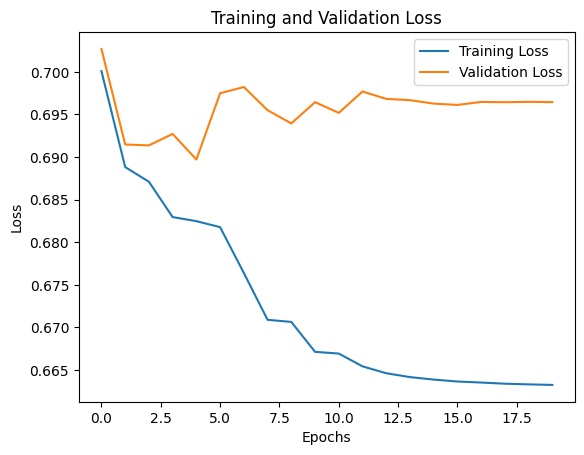

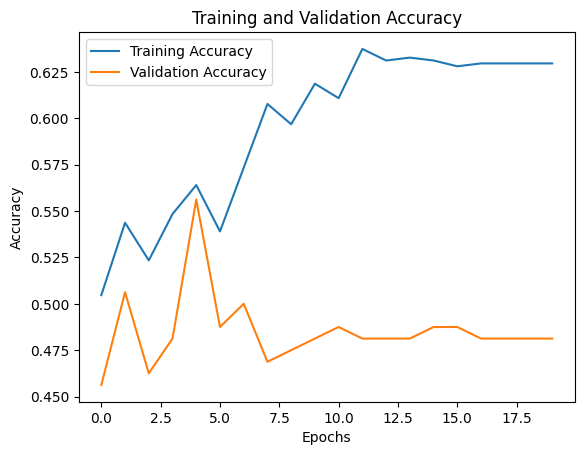

In [ ]:
# Plot the loss vs val_loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy vs val_accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7/7 - 0s - 20ms/step - accuracy: 0.5200 - loss: 0.7009
Test Accuracy: 0.5199999809265137
Train Loss: 0.6632607579231262
Test Loss: 0.7009118795394897
Test Accuracy: 0.5199999809265137


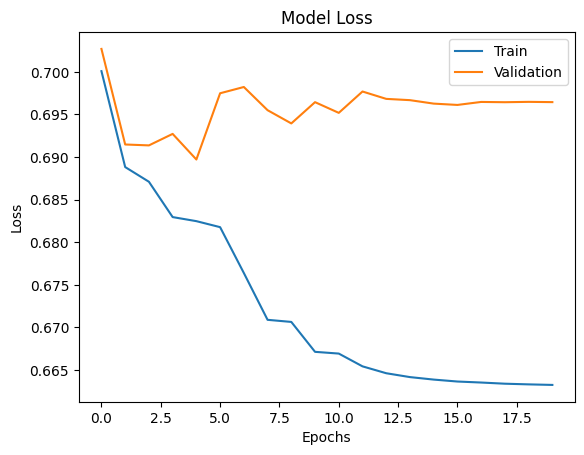

In [ ]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy:', test_acc)

# Print the train and test loss
print('Train Loss:', history.history['loss'][-1])
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Plot the train and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Set directories for training and testing data
train_dir = "/content/gdrive/MyDrive/Train"
test_dir = "/content/gdrive/MyDrive/Test"

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

# Load the ResNet50 base model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)  # Two output classes: benign and malignant

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train for 10 epochs
history_10 = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Unfreeze some base model layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train for 5 more epochs (total 15)
history_15 = model.fit(train_generator, validation_data=val_generator, epochs=5)

# Train for another 5 epochs (total 20)
history_20 = model.fit(train_generator, validation_data=val_generator, epochs=5)

# Output accuracy and loss after each training stage
val_loss_10, val_acc_10 = model.evaluate(val_generator)
print(f'Epoch 10 - Accuracy: {val_acc_10}, Loss: {val_loss_10}')

val_loss_15, val_acc_15 = model.evaluate(val_generator)
print(f'Epoch 15 - Accuracy: {val_acc_15}, Loss: {val_loss_15}')

val_loss_20, val_acc_20 = model.evaluate(val_generator)
print(f'Epoch 20 - Accuracy: {val_acc_20}, Loss: {val_loss_20}')

Found 2680 images belonging to 2 classes.
Found 669 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 816s 9s/step - accuracy: 0.5073 - loss: 1.3901 - val_accuracy: 0.5321 - val_loss: 0.6397
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 823s 9s/step - accuracy: 0.6086 - loss: 0.6439 - val_accuracy: 0.8057 - val_loss: 0.6232
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 790s 9s/step - accuracy: 0.6431 - loss: 0.6164 - val_accuracy: 0.5441 - val_loss: 0.6225
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 799s 9s/step - accuracy: 0.6802 - loss: 0.5959 - val_accuracy: 0.6233 - val_loss: 0.6121
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 789s 9s/step - accuracy: 0.6749 - loss: 0.5955 - val_accuracy: 0.7115 - val_loss: 0.5790
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 745s 9s/step - accuracy: 0.6929 - loss: 0.5650 - val_accuracy: 0.7982 - val_loss: 0.5507
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 754s 9s/step - accuracy: 0.7014 - loss: 0.5549 - val_accuracy: 0.7758 - val_loss: 0.5443
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 748s 9s/step - accuracy: 0.7220 - loss: 0.5391 - val_accuracy: 0.7534 - val_loss: 0.

In [ ]:
#Melanoma Cancer Classification Using ResNet with  Data Augmentation
# Ensure that 'model' is defined and compiled before this cell is executed
# For example, you might have a cell like this earlier in your notebook:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np #Added import statement for numpy

model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define your test data (replace with your actual test data)
X_test = np.random.rand(200, 20)  # Example test data
y_test = np.random.randint(0, 2, 200)  # Example test labels

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Convert accuracy to percentage and print it
test_acc_percentage = test_acc * 100
print(f'Test Accuracy: {test_acc_percentage:.2f}%')

7/7 - 0s - 43ms/step - accuracy: 0.4400 - loss: 0.6983
Test Accuracy: 44.00%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step


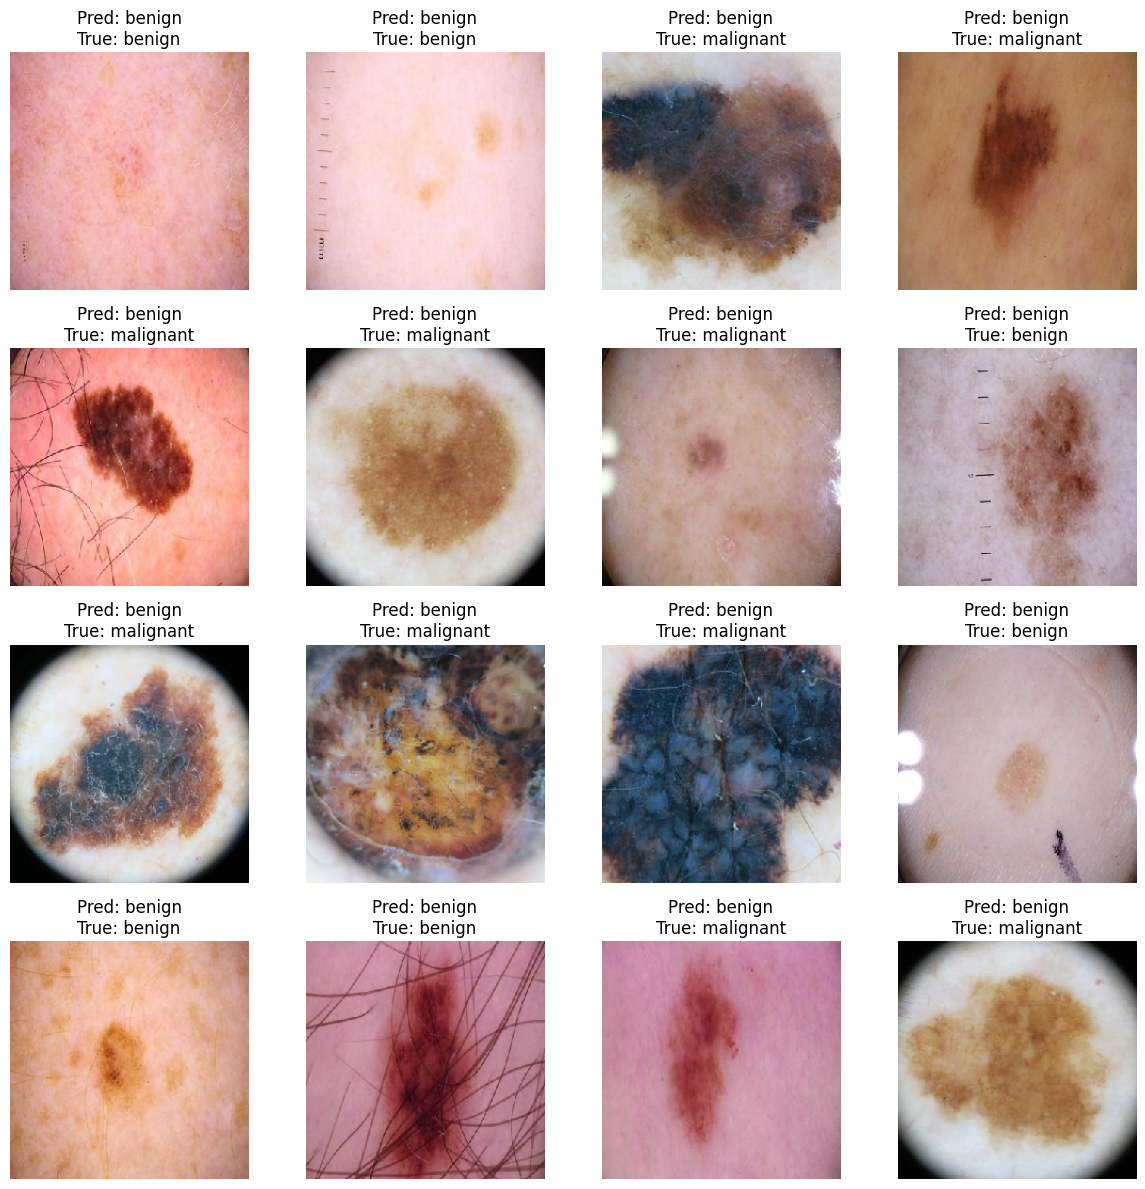

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the model is designed for image data
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming test_generator is an instance of ImageDataGenerator
x_test, y_test = next(test_generator)

# Predict the classes of the testing data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

label_dict = {0: 'benign', 1: 'malignant'}

# Plot the images along with their predicted and actual labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    pred_label = label_dict[y_pred_classes[i]]
    true_label = label_dict[y_true_classes[i]]
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


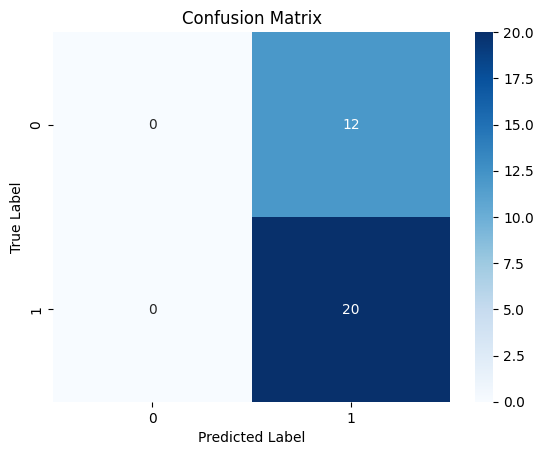

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the model is designed for image data
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming test_generator is an instance of ImageDataGenerator and already initialized
x_test, y_test = next(test_generator)

# Predict the classes of the testing data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#with cnn

Found 2680 images belonging to 2 classes.
Found 669 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 795s 9s/step - accuracy: 0.5157 - loss: 6.3471 - val_accuracy: 0.5845 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 780s 9s/step - accuracy: 0.4879 - loss: 0.6953 - val_accuracy: 0.5277 - val_loss: 0.6743 - learning_rate: 0.0010
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 797s 9s/step - accuracy: 0.5489 - loss: 0.7101 - val_accuracy: 0.5277 - val_loss: 0.6912 - learning_rate: 0.0010
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 778s 9s/step - accuracy: 0.5138 - loss: 0.6884 - val_accuracy: 0.5277 - val_loss: 0.6425 - learning_rate: 0.0010
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 776s 9s/step - accuracy: 0.5130 - loss: 0.6676 - val_accuracy: 0.5277 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 805s 9s/step - accuracy: 0.5302 - loss: 0.6928 - val_accuracy: 0.5277 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 803s 9s/step - accuracy: 0.5238 - loss: 0.6923 - val_accuracy: 0.52

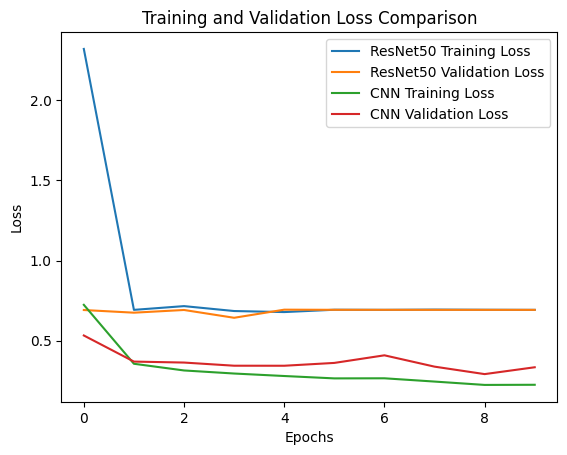

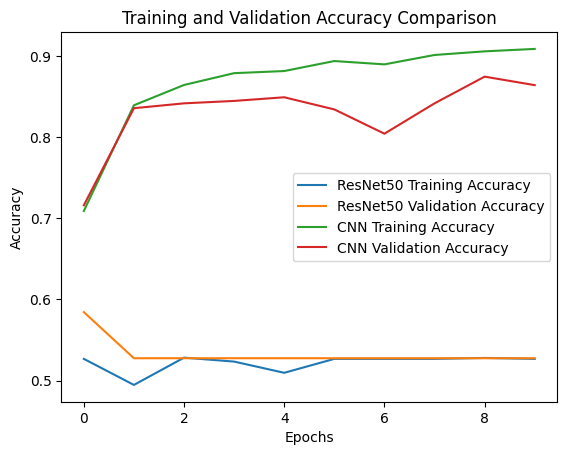

32/32 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 925ms/step


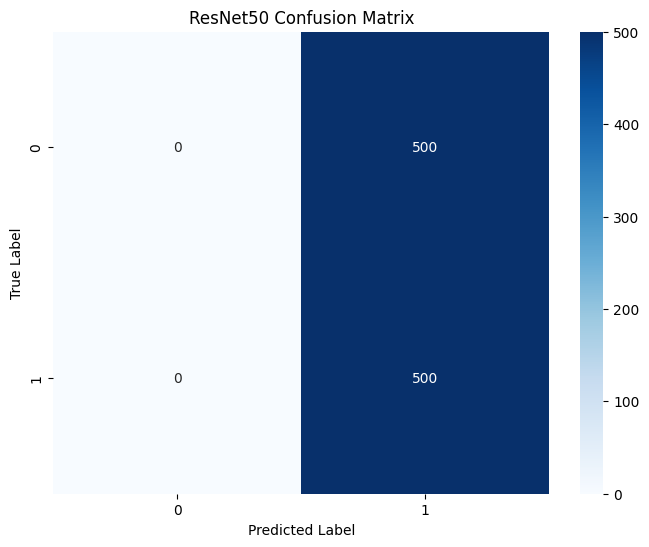

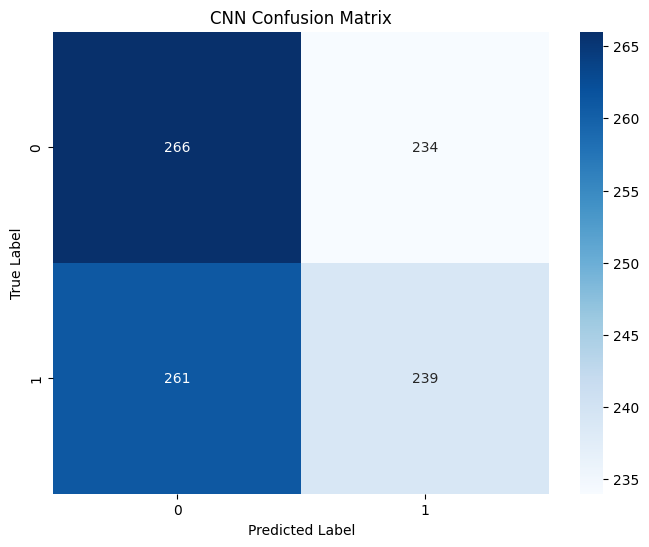

ResNet50 Test Accuracy: 0.5
CNN Test Accuracy: 0.8889999985694885


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Paths to the dataset
train_dir = "/content/gdrive/MyDrive/Train"
test_dir = "/content/gdrive/MyDrive/Test"
classes = ["malignant", "benign"]

# Data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='validation')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Define the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the ResNet50 model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Binary classification (malignant/benign)
])

# Compile the CNN model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=0.00001)

# Train ResNet50 model
resnet_history = resnet_model.fit(train_generator, validation_data=val_generator, epochs=10,
                                  callbacks=[learning_rate_reduction], verbose=1)

# Train CNN model
cnn_history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10,
                            callbacks=[learning_rate_reduction], verbose=1)

# Evaluate ResNet50 model on the test set
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_generator, verbose=2)
print('ResNet50 Test Accuracy:', resnet_test_acc)

# Evaluate CNN model on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_generator, verbose=2)
print('CNN Test Accuracy:', cnn_test_acc)

# Plot Training/Validation Loss for both models
plt.plot(resnet_history.history['loss'], label='ResNet50 Training Loss')
plt.plot(resnet_history.history['val_loss'], label='ResNet50 Validation Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training/Validation Accuracy for both models
plt.plot(resnet_history.history['accuracy'], label='ResNet50 Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet50 Validation Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate predictions and confusion matrices for both models

# ResNet50 predictions
y_resnet_pred = resnet_model.predict(test_generator)
y_resnet_pred_classes = np.argmax(y_resnet_pred, axis=1)
y_true_classes = test_generator.classes

# CNN predictions
y_cnn_pred = cnn_model.predict(test_generator)
y_cnn_pred_classes = np.argmax(y_cnn_pred, axis=1)

# Confusion matrix for ResNet50
resnet_cm = confusion_matrix(y_true_classes, y_resnet_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(resnet_cm, annot=True, fmt='d', cmap='Blues')
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion matrix for CNN
cnn_cm = confusion_matrix(y_true_classes, y_cnn_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Final comparison of test accuracy
print(f"ResNet50 Test Accuracy: {resnet_test_acc}")
print(f"CNN Test Accuracy: {cnn_test_acc}")
